
## 01MIAR - Actividad Video Valencia Pollution

## NumPy y Pandas

### Objetivos:
- Aplicar diferentes técnicas de tratamiento de estructuras numéricas con Numpy y datos estructurados con Pandas.

### Instrucciones:
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación. Siempre será tenido en cuenta cualquier detalle técnico avanzado o no visto en clase relacionado con el tema (explicar el porqué y usabilidad).
- No está permitido compartir los resultados ni el código en ninguno de los foros.
- Revisar los temas así como las sesiones sobre Numpy y Pandas para aplicar dichos contenidos.
- Proponer las respuestas en las celdas a dicho efecto en cada punto, si se necesitan más celdas añadirlas en su sitio correspondiente
- Mostrar de manera clara la respuesta a las preguntas, mediante código

### Entrega:
- Este mismo notebook con las respuetas

### Evaluación
- Esta actividad corresponde con el 10% de la nota final de la asignatura.

### Fecha Realización
- Convocatoria 1 - 29/11/2024 00:00 - 29/11/2024 23:59

#### Descripción
El conjunto de datos "valencia_pollution_dataset.csv" (fichero disponible adjunto a la actividad) proviene de una descarga de datos del servicio web del ayuntamiento de la ciudad de Valencia de datos abiertos.

Los datos recabados de este servicio web son de mediciones cada hora de una serie de estaciones de contaminación atmosférica.

https://valencia.opendatasoft.com/explore/dataset/estacions-contaminacio-atmosferiques-estaciones-contaminacion-atmosfericas/information/

Cada estación realiza una serie de mediciones acerca de la calidad del aire, y de ciertas sustancias que se consideran importantes para analizar la contaminación atmosférica en la ciudad.

#### Columnas para trabajar:
- objectid: id de la estación
- nombre: nombre de la estación
- dirección: dirección de la estación
- tipozona: tipo de la zona, urbana o sub urbana
- tipoemision: tráfico o fondo
- so2: niveles de dióxido de azufre
- no2: niveles de dióxido de nitrogeno
- o3: niveles de ozono
- co: niveles de monóxido de carbono
- pm10: niveles de partículas en suspensión hasta 10um
- pm25: niveles de partículas en suspensión hasta 2,5um
- fecha_carga: timestamp de la actualización de los datos
- calidad_ambiental: estimación de la calidad del aire

In [31]:
# Importando las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as plt_dates

## 01
Carga de datos de csv (valencia_pollution_dataset.csv) en un DataFrame

In [32]:
# Cargamos el dataset
df = pd.read_csv('valencia_pollution_dataset.csv', sep=',', header=0, engine='python',
                 names=['station_id','nombre','direccion','tipozona','tipoemision','so2','no2','o3','co','pm10','pm25','fecha_carga','calidad_ambiental'])

# Mostramos las primeras filas del dataset
display(df.head())

,station_id,nombre,direccion,tipozona,tipoemision,so2,no2,o3,co,pm10,pm25,fecha_carga,calidad_ambiental
0,26,Pista de Silla,"C/ Filipinas, s/n",Urbana,Tráfico,0.0,10,71.0,0.7,8.0,3.0,2024-05-24T20:20:06+00:00,Razonablemente Buena
1,28,Viveros,Jardines de Viveros,Urbana,Fondo,0.0,5,88.0,NaN,NaN,NaN,2024-05-24T20:20:08+00:00,Razonablemente Buena
2,431,Olivereta,Av. del Cid amb Av. de les Tres Creus,Urbana,Tráfico,NaN,24,NaN,NaN,20.0,11.0,2024-05-24T20:20:11+00:00,Razonablemente Buena
3,432,Patraix,"Archiduque Carlos, 84ac",Urbana,Tráfico,NaN,15,NaN,NaN,20.0,11.0,2024-05-24T20:20:12+00:00,Razonablemente Buena
4,23,Francia,"Avda. de Francia, 60",Urbana,Tráfico,1.0,3,82.0,0.1,9.0,6.0,2024-05-24T20:20:04+00:00,Razonablemente Buena


## 02
- ¿Cuál es el rango temporal del dataset?
- Obtención del número de estaciones que tienen un sensor para medir monóxido de carbono

In [37]:
# Fecha de carga inicial
fecha_carga_inicial = pd.to_datetime(df['fecha_carga'].min())
print(f"Fecha inicial del dataset: {fecha_carga_inicial}")

# Fecha de carga final
fecha_carga_final = pd.to_datetime(df['fecha_carga'].max())
print(f"Fecha final del dataset: {fecha_carga_final}")

# Rango temporal
print(f"Rango temporal: {fecha_carga_final - fecha_carga_inicial}")

# Número de estaciones con sensor para medir monoxido de carbono
num_estaciones_co = df[df['co'].notnull()]['station_id'].nunique()
print(f"Número de estaciones con sensor para medir monoxido de carbono: {num_estaciones_co}")


Fecha inicial del dataset: 2024-05-24 20:20:04+00:00
Fecha final del dataset: 2024-05-26 10:20:13+00:00
Rango temporal: 1 days 14:00:09
Número de estaciones con sensor para medir monoxido de carbono: 3


## 03

- Número de estación con la media más alta de mediciones de monóxido de carbono

In [34]:
# Cogemos las mediciones de CO de cada estación, calculamos la media de cada una y elegimos la mayor
id_estacion = df.groupby(by='station_id')['co'].mean().idxmax()

# Guardamos un slice del dataset con los datos de esta estación para su uso en posteriores apartados
data_estacion = df[df['station_id'] == id_estacion]

# Obtenemos el nombre de la estación
nombre_estacion = data_estacion['nombre'].iloc[0]

print(f"Estación con la media más alta de mediciones de monóxido de carbono 'CO': {id_estacion} ({nombre_estacion})")

Estación con la media más alta de mediciones de monóxido de carbono 'CO': 26 (Pista de Silla)


## 04
Realizar el histograma de dióxido de nitrógeno de la estación del punto anterior

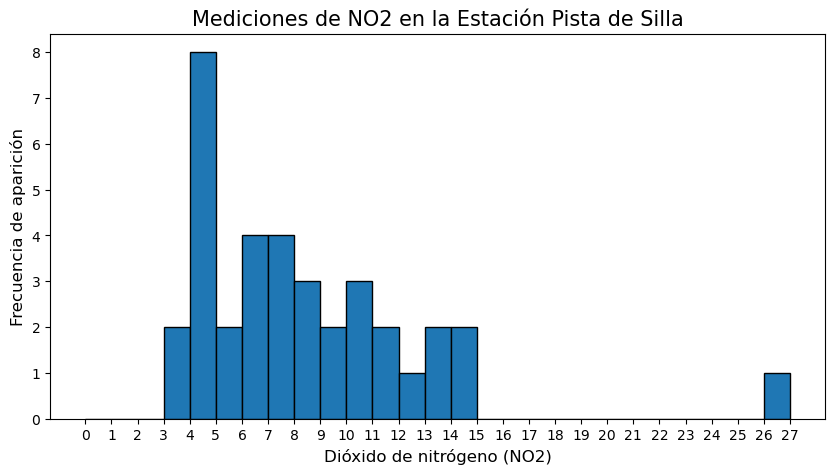

In [35]:
# Ajustamos el tamaño de la figura
fig = plt.subplots(figsize=(10, 5))

# Creamos el gráfico con los datos de NO2 de la estación
bins = np.arange(0, data_estacion['no2'].max() + 1)
plt.hist(data_estacion['no2'], bins=bins, edgecolor='black')

# Mostramos los intervalos en el eje x
plt.xticks(bins)

# Añadimos título y etiquetas
plt.title(f'Mediciones de NO2 en la Estación {nombre_estacion}', fontsize=15)
plt.xlabel('Dióxido de nitrógeno (NO2)', fontsize=12)
plt.ylabel('Frecuencia de aparición', fontsize=12)

# Mostramos el gráfico
plt.show()

## 05
Realizar gráfica con  la línea temporal de las mediciones de ozono de la estación del punto anterior. Pista, la columna 'fecha_carga' habría que cambiarla de tipo.

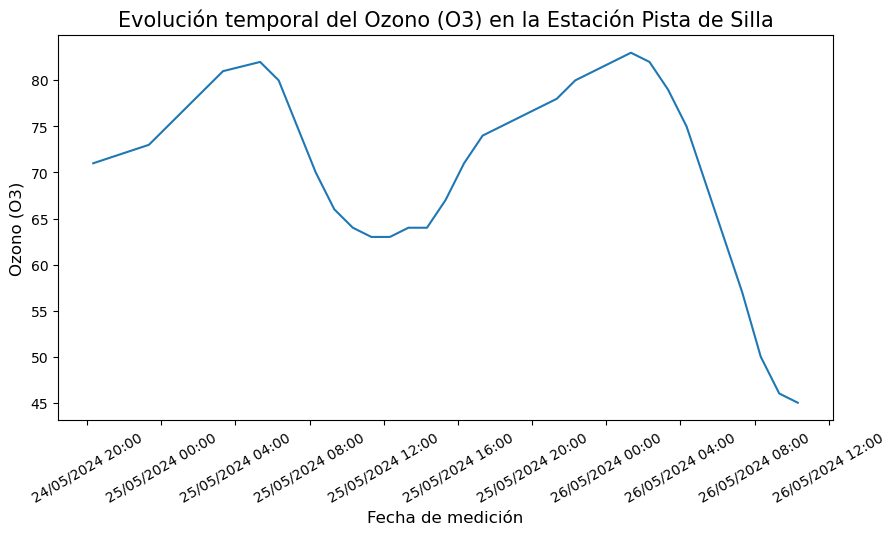

In [36]:
# Ajustamos el tamaño de la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 5))

# Formateamos las fechas del eje X en formato dd/mm/yyyy hh:mm
ax.xaxis.set_major_formatter(plt_dates.DateFormatter('%d/%m/%Y %H:%M'))

# Creamos el gráfico con los datos de O3 de la estación
# Utilizamos la función pd.to_datetime para convertir la columna 'fecha_carga' a un objeto datetime
plt.plot(data_estacion['fecha_carga'].apply(pd.to_datetime), data_estacion['o3'])

# Rotamos las etiquetas del eje x para que no se solapen
plt.xticks(rotation=30)

# Añadimos título y etiquetas
plt.title(f'Evolución temporal del Ozono (O3) en la Estación {nombre_estacion}', fontsize=15)
plt.xlabel('Fecha de medición' , fontsize=12)
plt.ylabel('Ozono (O3)', fontsize=12)

# Mostramos el gráfico
plt.show()